# Aproximação de função utilizando a rede MLP

Realiza a aproximação da onda senoidal utilizando a rede MLP

## Etapa 01
Importar as bibliotecas de aprendizado de máquina e computação científica.

In [1]:
# Bibliotecas de aprendizado de máquina
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

# Bibliotecas de computação científica
import numpy as np
import matplotlib.pyplot as plt

2024-10-01 15:38:51.379220: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-01 15:38:51.480803: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-01 15:38:51.596438: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-01 15:38:51.686541: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-01 15:38:51.718969: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-01 15:38:51.907069: I tensorflow/core/platform/cpu_feature_gu

## Etapa 02
Criar a base de dados sintética.

In [2]:
NUM_SAMPLES = 500

# Conjunto de treinamento
x_train = np.random.uniform(0, 1, NUM_SAMPLES)
x_train = np.sort(x_train, axis=0)
y_train = np.sin(4 * np.pi * x_train)

# Conjunto de validação
x_test = np.random.uniform(0, 1, int(NUM_SAMPLES/3))
x_test = np.sort(x_test, axis=0)
y_test = np.sin(4 * np.pi * x_test)

## Etapa 03
Conhecer a dimensão dos conjuntos de treinamento e validação.

In [3]:
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (500,)
y_train (500,)
x_test (166,)
y_test (166,)


## Etapa 04
Projetando a rede neural MLP utilizando o Keras.

In [1]:
model = Sequential()
model.add(Dense(256, input_dim = 1, activation='relu')),
model.add(Dense(128, activation='relu')),
model.add(Dense(64, activation='relu')),
model.add(Dense(1, activation='tanh'))

model.summary()

NameError: name 'Sequential' is not defined

## Etapa 05
Compilar o modelo.

Optimizer: As opções são encontradas em https://keras.io/api/optimizers/

Loss: As opções são encontradas em https://keras.io/api/losses/

Metrics: As opções são encontradas em https://keras.io/api/metrics/

In [5]:
model.compile(optimizer='Adam',
              loss='mse',
              metrics=['mae'])

## Etapa 06
Treinar o modelo e realizar a validação.

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101 - mae: 0.0642 - val_loss: 0.0073 - val_mae: 0.0616
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0102 - mae: 0.0730 - val_loss: 0.0112 - val_mae: 0.0796
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0100 - mae: 0.0715 - val_loss: 0.0074 - val_mae: 0.0666
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0071 - mae: 0.0614 - val_loss: 0.0090 - val_mae: 0.0753
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0094 - mae: 0.0734 - val_loss: 0.0064 - val_mae: 0.0537
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0084 - mae: 0.0617 - val_loss: 0.0136 - val_mae: 0.0866
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0139 - mae: 0.0883 - val_loss: 0.0156 - val_mae: 0.0912
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0148 - mae: 0.0832 - val_loss: 0.0042 - val_mae: 0.0502
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.005

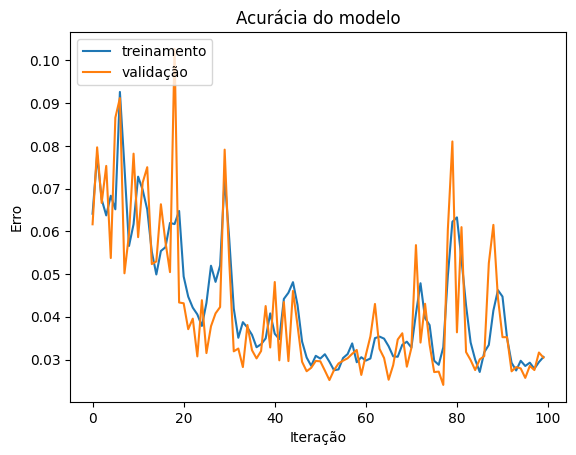

In [7]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Acurácia do modelo')
plt.ylabel('Erro')
plt.xlabel('Iteração')
plt.legend(['treinamento', 'validação'], loc='upper left')
plt.show()

## Etapa 07
Realizar algumas predições.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


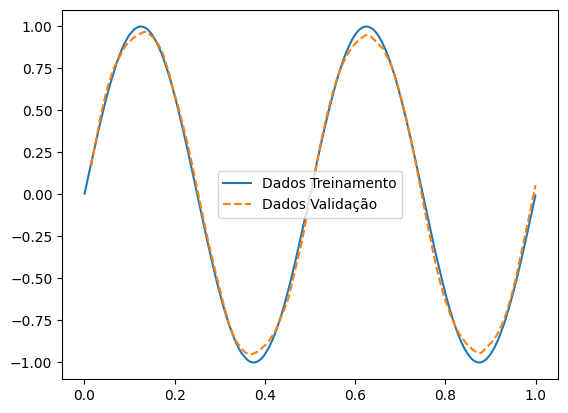

In [8]:
y_pred = model.predict(x_test)

plt.plot(x_train, y_train, '-', label='Dados Treinamento')
plt.plot(x_test, y_pred, '--', label='Dados Validação')
plt.legend()

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step


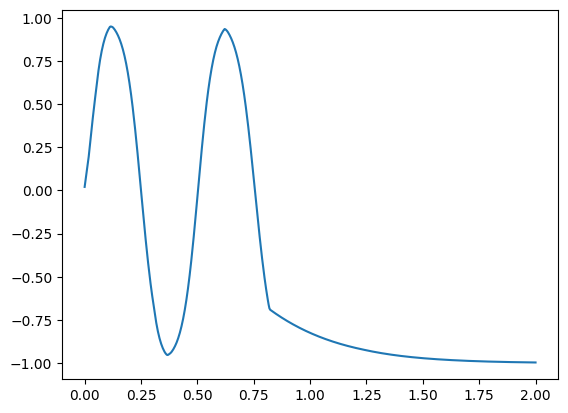

In [39]:
len(x_test)
t = np.linspace(0, 2, num=555)

y_t = model.predict(t)

plt.plot(t, y_t)